**Analise de dados sobre amostra do setor de Área de dados no Brasil.**

*Introdução:*

Nos últimos anos a demanda no setor de dados pelo mundo tem crescido a todo momento, no Brasil não é diferente a procura por esse profissional que possa exercer esse papel de poder extrair e proporcionar insight valiosos para empresa tem atraido bastantes olhares, seja pela sua importancia para empresa quanto do lado do profissional em sí, que veem nesse meio oportunidades empolgantes e salários altamente competitivos.

Sendo assim estamos utilizando uma amostragem de uma pesquisa para podermos ter uma analise preliminar sobre como se encontra os profissionais atuantes nesse setor.

*Obejtivos da análise:*

- Identificar o perfil dos profissionais e possiveis desigualdades.
- Destacar os conhecimentos mais necessários na área de dados que está em contante evolução.
- Levantar qual a média de renda de um profissional da área de dados.


*FONTE DOS DADOS:*
https://www.kaggle.com/datasets/datahackers/pesquisa-data-hackers-2019


## **Dicionário**

**Fonte dos dados**

https://www.kaggle.com/datasets/datahackers/pesquisa-data-hackers-2019

## **Base de dados**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt


In [ ]:
arquivo = "/content/datahackers-survey-2019-anonymous-responses.csv"
df = pd.read_csv(arquivo)

In [ ]:
# Verificando os dados
df.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')",...,"('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,...,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,...,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,...,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,...,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Business Intelligence/Analista de BI
4,pj9mgud4d6mdct1l7vq0pj9mgu78h6ju,27.0,Masculino,1,NaN,1.0,Graduação/Bacharelado,Freelancer,de 6 a 10,1.0,...,0,Udemy,NaN,1.0,NaN,NaN,Computação / Engenharia de Software / Sistemas...,Internet/Ecommerce,"C-level (CDO, CIO, CTO)",NaN


## **Data frames**

In [ ]:
colunas_selecionadas = [
    "('P1', 'age')",
    "('P2', 'gender')",
    "('P3', 'living_in_brasil')",
    "('P5', 'living_state')",
    "('P8', 'degreee_level')",
    "('P10', 'job_situation')",
    "('P12', 'workers_number')",
    "('P16', 'salary_range')",
    "('P17', 'time_experience_data_science')",
    "('P18', 'time_experience_before')",
    "('P19', 'is_data_science_professional')",
    "('P22', 'most_used_proggraming_languages')"
]

df_filtered = df[colunas_selecionadas]

df_filtered.columns = [col.split(",")[1].strip().replace("'", "").replace(")","") for col in df_filtered.columns]

# Exibir o DataFrame resultante
print(df_filtered.columns)

Index(['age', 'gender', 'living_in_brasil', 'living_state', 'degreee_level',
       'job_situation', 'workers_number', 'salary_range',
       'time_experience_data_science', 'time_experience_before',
       'is_data_science_professional', 'most_used_proggraming_languages'],
      dtype='object')


In [ ]:
df1 = df_filtered.dropna()

In [ ]:
# Passando a idade para inteiros.

df1['age'] = df1['age'].astype(int)

<ipython-input-7-277c738f2715>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age'] = df1['age'].astype(int)


In [ ]:
# Verificando df apos limpeza de dados nulos.

df1.head()

,age,gender,living_in_brasil,living_state,degreee_level,job_situation,workers_number,salary_range,time_experience_data_science,time_experience_before,is_data_science_professional,most_used_proggraming_languages
1,24,Feminino,1,São Paulo (SP),Estudante de Graduação,Empregado (CTL),Acima de 3000,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,Python
2,26,Masculino,1,São Paulo (SP),Graduação/Bacharelado,Empregado (CTL),Acima de 3000,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,Python
3,21,Masculino,1,São Paulo (SP),Estudante de Graduação,Estagiário,de 11 a 50,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,SQL
6,34,Masculino,1,Rio Grande do Sul (RS),Pós-graduação,Empregado (CTL),de 51 a 100,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Menos de 1 ano,1,Java
9,28,Masculino,1,São Paulo (SP),Mestrado,Empregado (CTL),Acima de 3000,de R$ 8.001/mês a R$ 12.000/mês,de 2 a 3 anos,de 6 a 10 anos,1,R


## **Divisão por Gênero**

In [ ]:
# @title Criando dicionario para definir faixas etárias e faixa de renda.

# Verificando quais as faixas de salarios.
df1['salary_range'].drop_duplicates()

# Definir a ordem das categorias de renda mensal
order_renda_mensal = [
    '- 1.000', '1.001 - 2.000', '2.001 - 3.000', '3.001 - 4.000',
    '4.001 - 6.000', '6.001 - 8.000', '8.001 - 12.000', '12.001 - 16.000',
    '16.001 - 20.000', '20.001 - 25.000', '+ 25.001'
]

# Converter a coluna 'renda_mensal' em uma variável categórica com a ordem especificada
df1['renda_mensal'] = pd.Categorical(df1['renda_mensal'], categories=order_renda_mensal, ordered=True)



dicionario_idade =  {
    '18 à 20': 1,
    '21 à 25': 2,
    '26 à 30': 3,
    '31 à 35': 4,
    '36 à 40': 5,
    '40 à 45': 6,
    '46 à 50': 7,
    '50 +': 8

}
# Criação de uma nova coluna 'faixa_etaria' no DataFrame
df1['faixa_etaria'] = pd.cut(df1['age'], bins=[-float('inf'), 20, 25, 30, 35, 40, 45, 50, float('inf')],labels=dicionario_idade.keys(), right=False)

<ipython-input-29-75a75b647a26>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45)


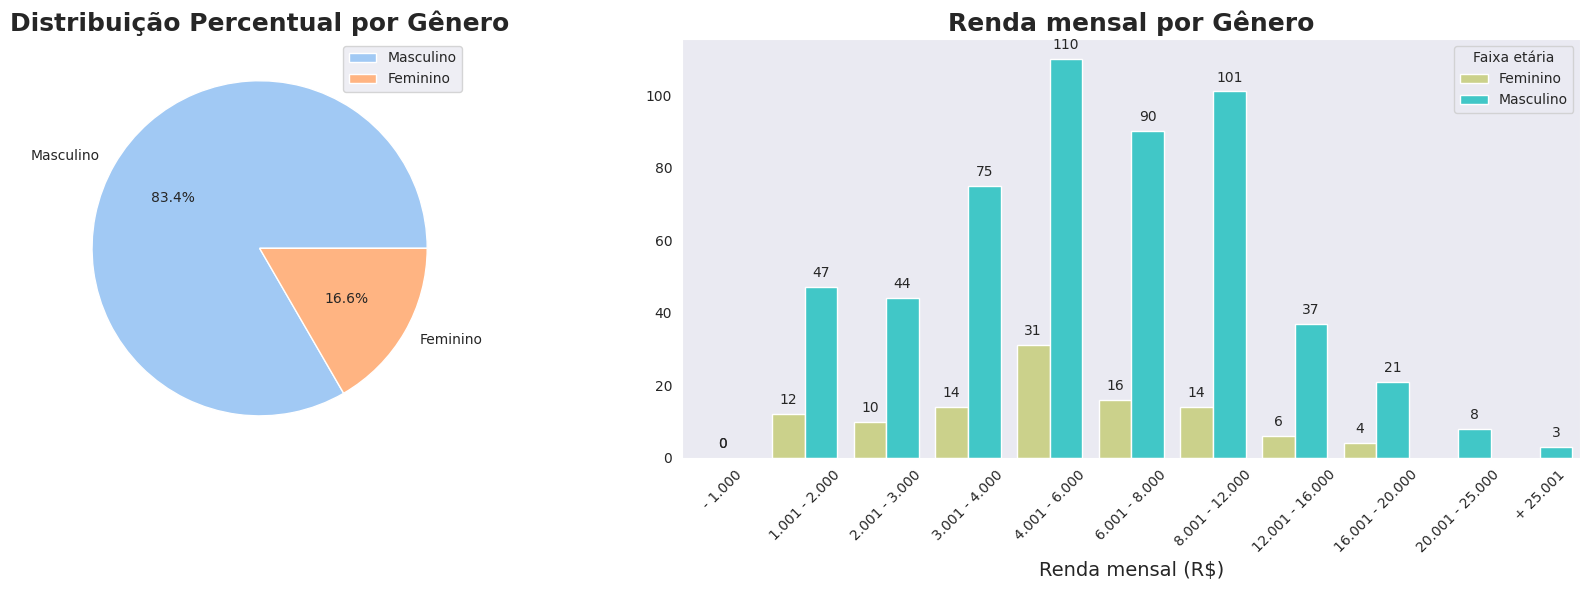

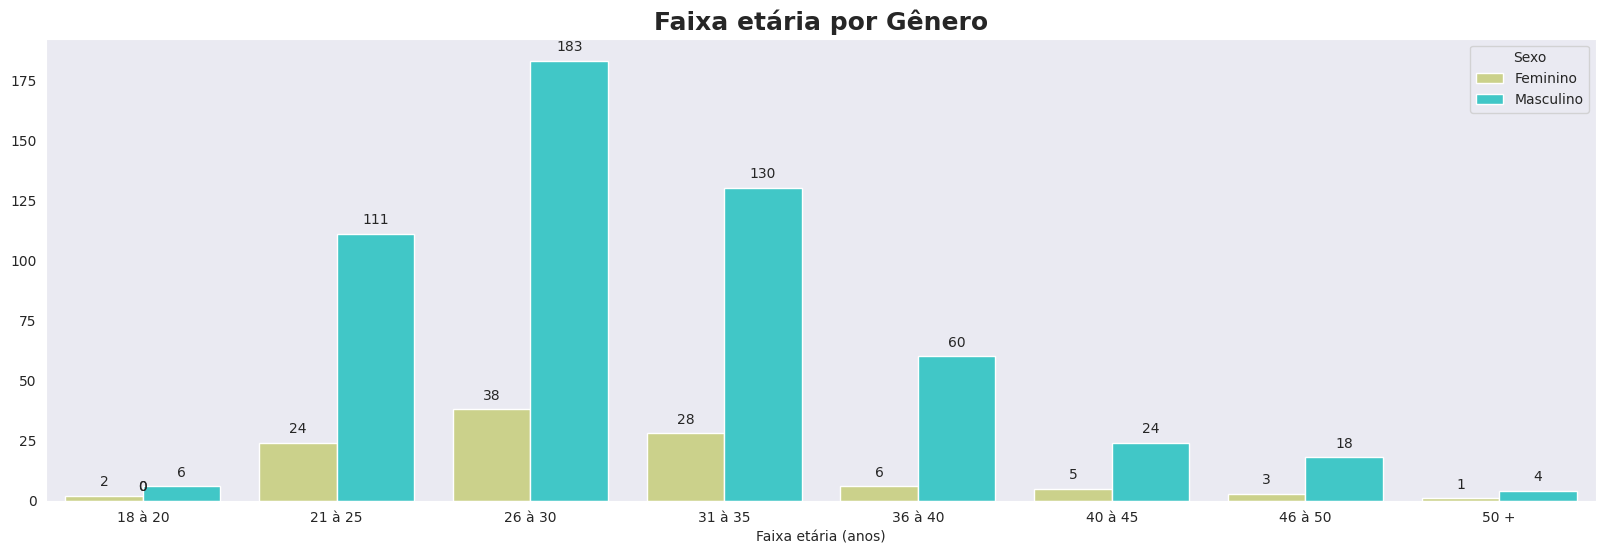

In [ ]:
# @title Código referente ao gráfico.

percentagens = df1['gender'].value_counts(normalize=True) * 100

# Configurar o estilo
sns.set_style('dark')

# Criar subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de pizza
axs[0].pie(percentagens, labels=percentagens.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
axs[0].set_title('Distribuição Percentual por Gênero',fontsize= 18,fontweight='bold')
axs[0].legend(fontsize=10)

# Gráfico de barras
grafico = sns.countplot(data=df1, x='renda_mensal', hue='gender', palette='rainbow_r', ax=axs[1],)

# Adicionar contagem nas barras
for p in grafico.patches:
    grafico.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adicionar título e rótulos
grafico.set_title('Renda mensal por Gênero',fontsize= 18,fontweight='bold')
legenda = grafico.legend()
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45)
legenda.set_title("Faixa etária")
grafico.set_xlabel('Renda mensal (R$)', fontsize=14)
grafico.set_ylabel('', fontsize=14)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

print('\n\n\n\n\n')

# Grafico de faixa etaria por sexo.

with sns.axes_style('dark'):
    # Criar o count plot
    plt.figure(figsize=(20, 6))
    grafico = sns.countplot(data=df1, x='faixa_etaria', hue='gender', palette='rainbow_r')

    # Adicionar contagem nas barras

    for p in grafico.patches:
        grafico.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


    # Adicionar título
    plt.title('Faixa etária por Gênero',fontsize = 18,fontweight='bold')

    legenda = plt.legend()

    # Alterar o texto da legenda
    legenda.set_title("Sexo")

    # Adicionar rótulos aos eixos
    plt.xlabel('Faixa etária (anos)')
    plt.ylabel('')

    # Exibir o gráfico
    plt.show()



## **Linguagem de programação mais utilizada**

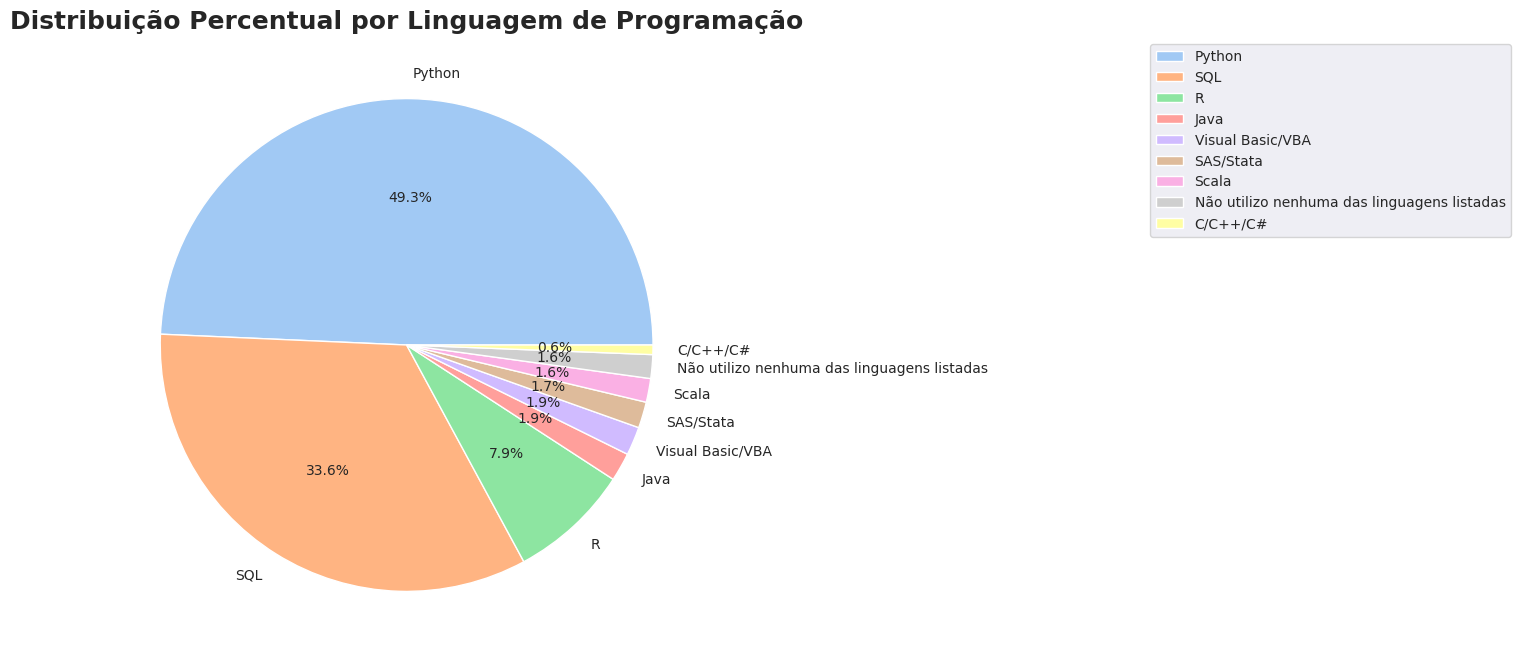

In [ ]:
# @title Código referente ao gráfico.

# Verificando todas linguagens informadas na amostra da pesquisa e quantidade de ocorrencia.
df1['most_used_proggraming_languages'].value_counts()

# Calcular as percentagens
percentagens = df1['most_used_proggraming_languages'].value_counts(normalize=True) * 100

# Configurar o estilo
sns.set_style('dark')
plt.figure(figsize=(14, 8))


# Criar o gráfico de pizza
plt.pie(percentagens, labels=percentagens.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))

plt.title('Distribuição Percentual por Linguagem de Programação',fontsize=18,fontweight='bold')  # Adicionei um título ao gráfico
plt.legend(fontsize=10, bbox_to_anchor=(2, 1), loc='upper center')


# Exibir o gráfico
plt.show()



## **Grau de escolaridade**

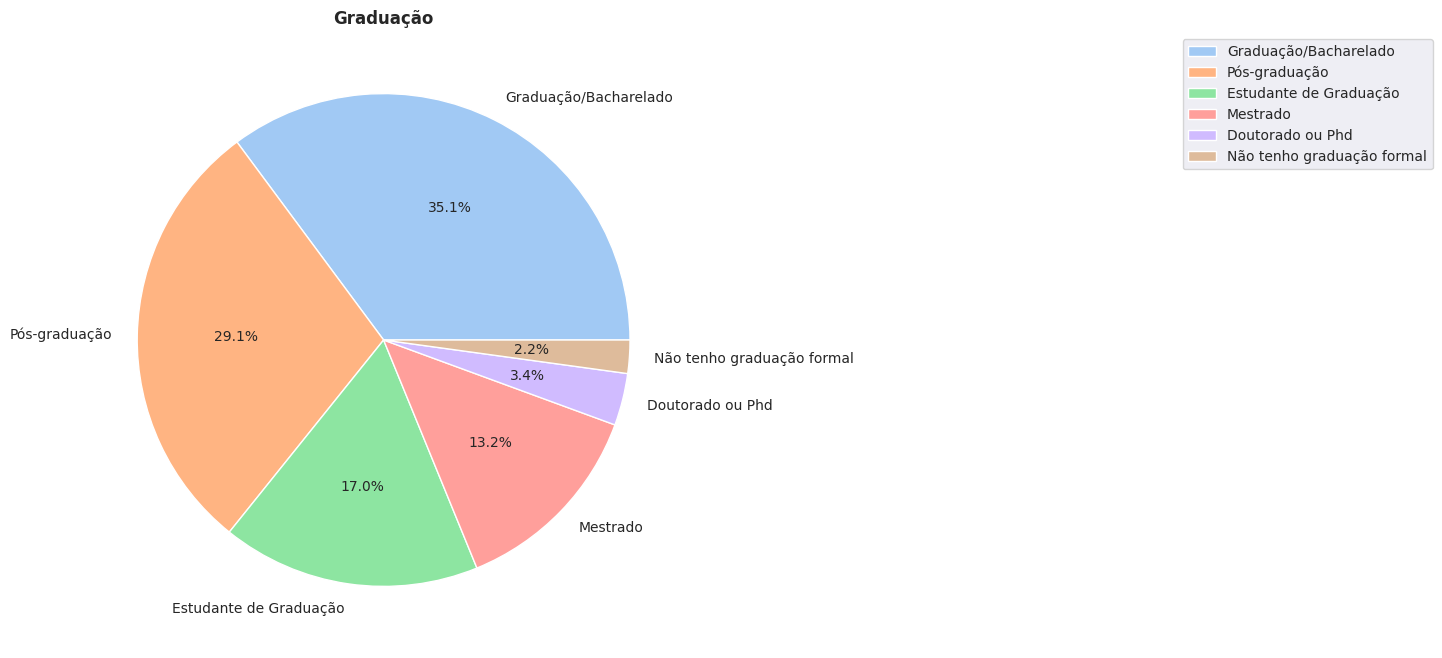

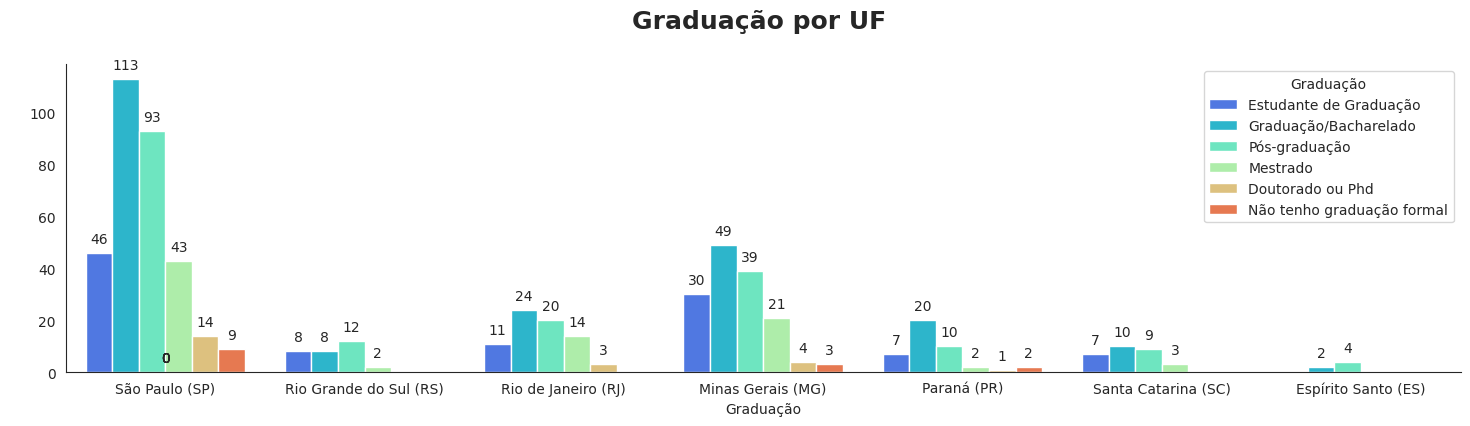

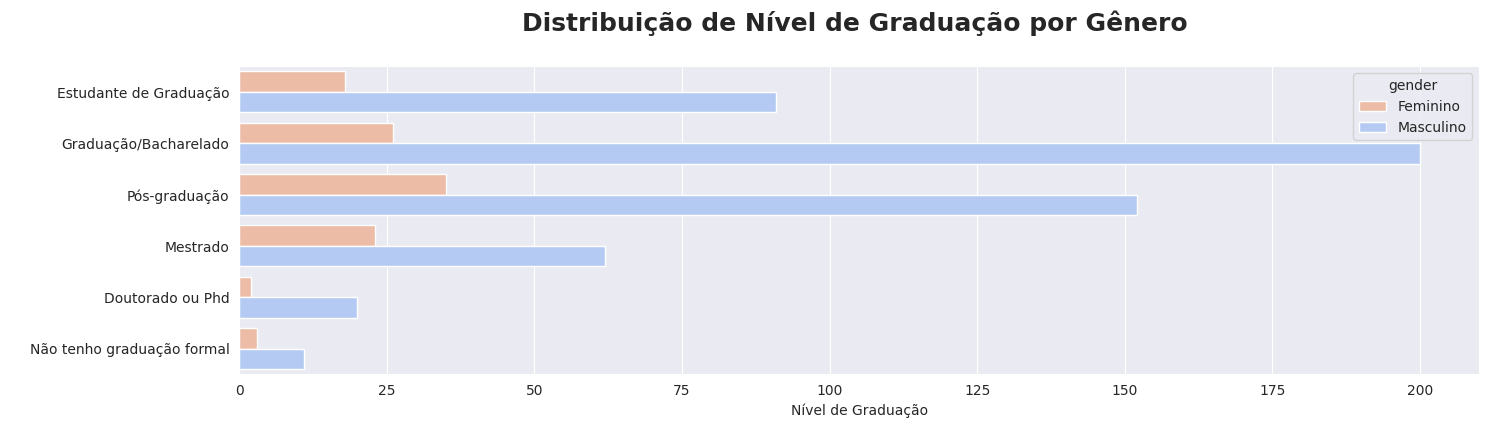

In [ ]:
# @title Código referente ao gráfico.

# Verificando os graus de escolaridade da amostra e quantidade.
df1['degreee_level'].value_counts()

# Calcular as percentagens
percentagens = df1['degreee_level'].value_counts(normalize=True) * 100

# Configurar o estilo
sns.set_style('dark')
plt.figure(figsize=(14, 8))


# Criar o gráfico de pizza
plt.pie(percentagens, labels=percentagens.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))

plt.title('Graduação',fontweight='bold')  # Adicionei um título ao gráfico
plt.legend(fontsize=10, bbox_to_anchor=(2, 1), loc='upper center')


# Exibir o gráfico
plt.show()

print('\n\n\n')

# Grafico de graduação por UF

with sns.axes_style('white'):
    # Criar o count plot
    plt.figure(figsize=(18, 4))
    grafico = sns.countplot(data=df1, x='living_state', hue='degreee_level', palette='rainbow')

    # Adicionar contagem nas barras
    for p in grafico.patches:
        grafico.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Adicionar título
    plt.title('Graduação por UF \n',fontsize = 18,fontweight='bold')

    legenda = plt.legend()

    # Alterar o texto da legenda
    legenda.set_title("Graduação")

    # Adicionar rótulos aos eixos
    plt.xlabel('Graduação')
    plt.ylabel(' ')

    # Remover as bordas
    sns.despine()

    # Exibir o gráfico
    plt.show()


print('\n\n')

# Grafico graduação por Genero

with sns.axes_style('darkgrid'):
    plt.figure(figsize=(16, 4))
    grafico = sns.countplot(data=df1, y='degreee_level', hue='gender', palette='coolwarm_r')
    plt.title('Distribuição de Nível de Graduação por Gênero \n', fontsize=18, fontweight='bold')
    plt.xlabel('Nível de Graduação')
    plt.ylabel(' ')
    plt.show()


## **Situação profissional**

<ipython-input-63-d21fe0d5c432>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.countplot(data=df1, y='job_situation', palette='rainbow', legend=False)


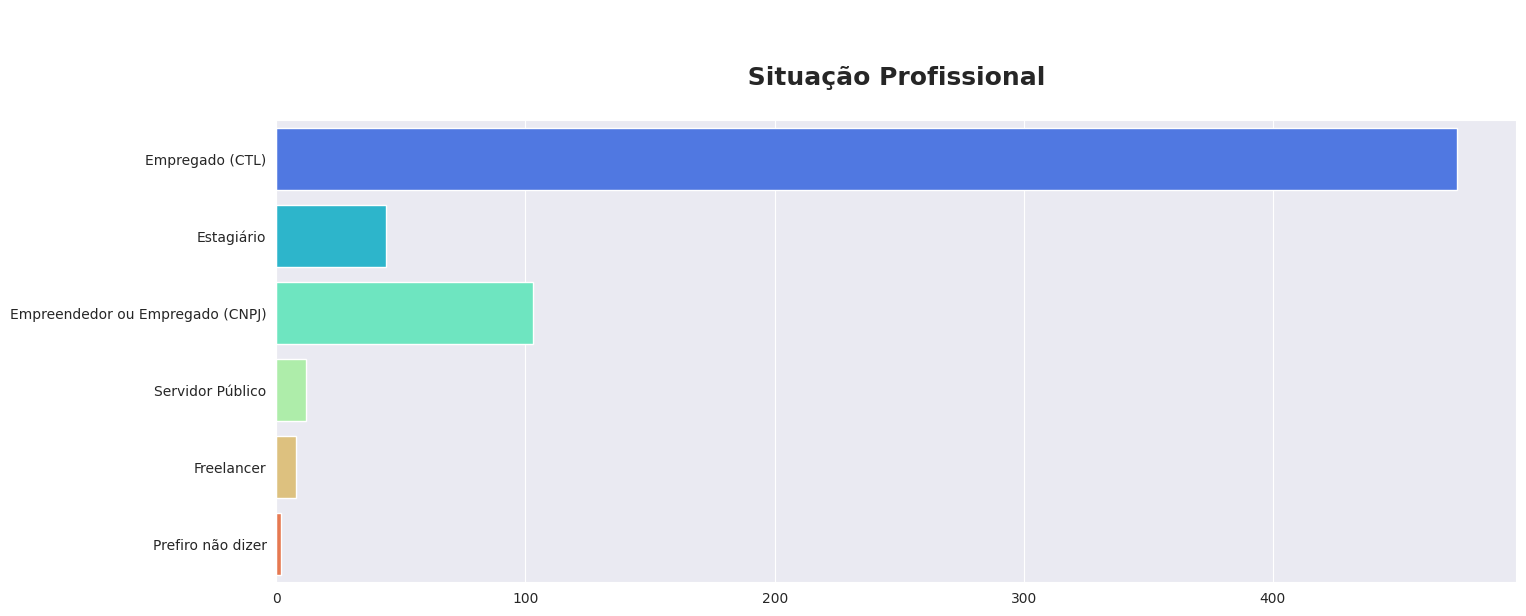

In [ ]:
# @title Código referente ao gráfico.

with sns.axes_style('darkgrid'):
    plt.figure(figsize=(16, 6))
    grafico = sns.countplot(data=df1, y='job_situation', palette='rainbow', legend=False)
    plt.title('\n\n Situação Profissional \n', fontsize=18, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()



***Conclusão:***

- Podemos verificar que até a data do ano 2019, majoritariamente o setor é dominado por homens, onde baseado na amostra aproximadamente 83% dos profissionais são do gênero masculino.

-  Sobre a média salarial mais comum entre os entrevistados variam de 3.000,00 até 16.000,00 reais , com alguns casos podendo ultrapassar a sifra dos 25.000,00 reais. Um detalhe que há uma discrepância entre os salários pagos aos homens e as mulheres, onde eles são mais numerosos em rendas mais elevadas, cabe uma analise mais especifica para poder saber os motivos que ocasiona esse fato.*

- Nesse setor a faixa etária se concentra entre os 21 e 35 anos, pessoas mais novas onde tem conseguido acompanhar essa grande demanda que vem surgindo.

- De longe as linguagens mais utilizadas são Python e SQL , ficando R em terceira colocação. Acredito que pela grande facilidade da curva de aprendizado nessas linguagens e como elas parecem terem nascidos para os dados, com suas grandes bibliotecas destinadas a eles, facilitando e muito o trabalho de analise dos mesmos.

- Na graduação, os estados onde se encontra os maiores números de profissionais  graduados são São Paulo, Minas Gerais e Rio de Janeiro. São Paulo estar em primeira coloção acaba por já ser esperado , uma vez que se trata do coração tecnologico e financeiro do país, onde as maiores empresas mantem suas sedes.

- Por fim a grande maioria dos entrevistados são contratados pelo regime CLT, superando e muito o número de profissionais que exercem seus trabalhos via pessoa juridica, seja como empregado (contratado) ou empreendedor.

Obs: * Sobre a diferença salarial entre os gêneros, verificando tambem o grafico sobre a graduação, podemos perceber que até o ano em que a pesquisa foi feita, os homens tambem eram mais numerosos em graduações mais elevadas como Pós-Graduação, Mestrado e Doutorado. Podendo tambem ser esse um dos fatores da divergência salarial.  

